<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>The Battle of the Neighbourhoods</font></h1>

## Instructions


Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

#### Review criteria
This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

For this week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)

For the second week, the final deliverables of the project will be:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):
 - Introduction where you discuss the business problem and who would be interested in this project.
 - Data where you describe the data that will be used to solve the problem and the source of the data.
 - Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
 - Results section where you discuss the results.
 - Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
 - Conclusion section where you conclude the report.
3. Your choice of a presentation or blogpost. (10 marks)

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.






## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Data</a>

3. <a href="#item3">Methodology</a>

4. <a href="#item4">Results</a>

5. <a href="#item5">Discussion</a>    

6. <a href="#item6">Conclusion</a>    
</font>
</div>

<a id='item1'></a>

## Introduction/Business Problem (Week 1 & 2)
(A description of the problem and a discussion of the background.  Discuss the business problem and who would be interested in this project.)

NYC is a multi-ethic melting pot. The NYC food scene is vibrant, diverse and constantly changing. Restaurants change with each passing season. For someone new to NYC and homesick, it is difficult to find which neighbourhood will offer cuisine which is closest to home. Hence our target audience are people who are new to NYC and would like to find the neighbourhood with the most familiar food culture compared to their home city, and also help foodies discover new neighbourhood cuisines.

The code will prompt the user to input their home city and confirm the location visually on a map.  It would then extract the relevant restaurant information from Foursquare, and via K-means clustering, identify the cluster which the home city belongs to and plot the neighbourhoods in the same cluster on the map.  The radius of the plots on the map is the actual area where the restaurant information is extracted from.  This can be changed via the radius setting below.

<a id='item2'></a>

## Data (Week 1 & 2)
(A description of the data and how it will be used to solve the problem.  Describe the data that will be used to solve the problem and the source of the data.)

We plan to leverage on Foursquare restaurant data as well as its menu data to identify neighbourhoods with most similar cuisine as our source city. From the list of neighbourhoods, we would extract the list of well-rated restaurants within a certain promixity to the center of the neighbourhood.  We also extract the same information from the home city.  We would then use that data to identify which NYC neighbourhood cuisine has the greatest similarity with the home city.

<a id='item3'></a>

## Methodology (Week 2)
(Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.)


* Plotted the center of all neighbourhoods and corresponding radii to check how much overlap and reasonableness of proximity to restaurants as well as the location of the center of the neighhourhoods.


* Plotted historgram of count of returned results for each neighbourhood to ensure the radius of the neighbourhood is sufficiently large so as to return enough results to rank top X types of restaurants but not so large as to materially overlap neighbouring neighbourhoods and hit the max of 100 results imposed by Foursquare which would reduce accuracy of representation.


* Used K-means clustering based on top X types of restaurants to group neighbourhoods into clusters.  Then identify the cluster which the home city belongs to and see which other neighbourhoods are in the same cluster.  This is the result set.  Lastly, because we don't have labels sets of neighbourhoods of similar cuisine for training so we could not used KNN algorithm.


* Manually examine final cluster results for reasonableness of the fit and tweaked the following hyper-parameters and reran.
    * cluster size
    * top X ranked
    * search radius

##### The following user variables can be tweaked.

In [71]:
# set number of clusters.  If no similar neighbourhoods are identified within the same cluster as the home city, you can REDUCE the cluster size and try again.  
# Similarly, if too many results are returned, you can INCREASE the cluster size so as to get a better fit.
kclusters = 100

# set number of top types of restaurants.  REDUCE to get a better fit as it would only consider the X most common types of restaurants.  
# If no similar neighbourhoods are identified within the same cluster as the home city, you can INCREASE the cluster size and try again.  
topX = 3

# radius of foursquare search.  This will apply to both the home city as well as NYC neighbourhoods. 
radius = 300

# limit of foursquare results, max 100
LIMIT = 100


In [72]:
# We first import the necessary libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup # to extract information from websites

import lxml # library to handle xml parsing
import requests # library to handle website requests

#!conda install -c anaconda wget 

import seaborn as sns

from pathlib import Path

import os

print('Libraries imported.')

Libraries imported.


In [73]:
# Use your own foursquare login details below
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'yyyy' # your Foursquare Secret
VERSION = '20180605'

In [74]:
# @hidden_cell
CLIENT_ID = 'X3R04YNUMJ1KTMNAMINRRD1XQ31UA1KJQPAZGK2EPGKZOCPK' # your Foursquare ID
CLIENT_SECRET = 'ZEPEKVBK50TWARXX4QSXUSYCAWSL3DRPSNS4T1Y3WBKGWLU5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [75]:
# download dataset
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [76]:
# open dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)# split text into list

In [77]:
# extract 'features' from dataset
neighborhoods_data = newyork_data['features']

In [78]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [79]:
# parse dataset to extract latitude and longitude
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [80]:
# get NYC latitude and longitude
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of New York City, NY are 40.7127281, -74.0060152.


In [81]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=radius,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [82]:
# define function to extract restaurants from given latitudes, longitudes and radius from Foursqure
def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?section=FOOD&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['shortName'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue Category',          
                  'Venue ID']
    
    return(nearby_venues)

In [83]:
# get restaurant data for all neighbourhoods from Foursquare
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

### CONTINUE FROM HERE IF YOU WANT TO SELECT A NEW HOME CITY

In [84]:
# prompt user for home city, get latitude and longitude, and plot on map.

# prompt user for home city
target_address = input('Enter city: eg."Mumbai, India"  ')

# get latitude and longitude
geolocator = Nominatim(user_agent="ny_explorer")
target_location = geolocator.geocode(target_address)
target_latitude = target_location.latitude
target_longitude = target_location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(target_address, target_latitude, target_longitude))

# create map of Target City using latitude and longitude values
map_targetcity = folium.Map(location=[target_latitude, target_longitude], zoom_start=15)

# add markers to map
label = '{}'.format(target_location)
label = folium.Popup(label, parse_html=True)
folium.Circle(
    [target_latitude, target_longitude],
    radius=radius,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_targetcity)  
    
map_targetcity

Enter city: eg."Mumbai, India"  Chinatown, Singapore
The geograpical coordinate of Chinatown, Singapore are 1.2837372, 103.8437976.


In [85]:
# define function to extract restaurants from given latitude, longitude and radius from Foursqure
def getNearbyVenuesOneLocation(name, latitude, longitude, radius=radius):
    
    venues_list=[]
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?section=FOOD&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude, 
        longitude, 
        VERSION, 
        radius, 
        LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        latitude, 
        longitude, 
        v['venue']['name'], 
        v['venue']['categories'][0]['shortName'],
        v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue Category',          
                  'Venue ID']
    
    return(nearby_venues)

In [86]:
# get venues for target city
target_venues = getNearbyVenuesOneLocation(name=target_address,
                                   latitude=target_latitude,
                                   longitude=target_longitude
                                  )

In [87]:
# combine results from NYC and target city
all_venues = pd.concat([target_venues, nyc_venues], ignore_index=True, sort=False)

# append home city to list of neighbourhoods
all_neighborhoods = neighborhoods
all_neighborhoods = all_neighborhoods.append({'Borough':target_address, 'Neighborhood':target_address, 'Latitude':target_latitude, 'Longitude':target_longitude}, ignore_index=True)

In [88]:
# group returned results by neighbourhood
all_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue ID
Neighborhood,,,,,
Allerton,10,10,10,10,10
Annadale,4,4,4,4,4
Arden Heights,1,1,1,1,1
Arlington,3,3,3,3,3
Arrochar,6,6,6,6,6
Astoria,21,21,21,21,21
Astoria Heights,9,9,9,9,9
Auburndale,2,2,2,2,2
Bath Beach,13,13,13,13,13


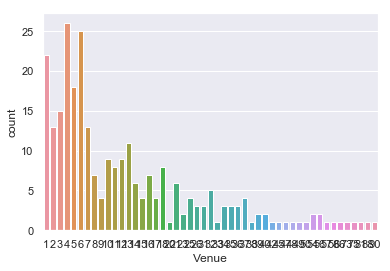

In [89]:
# plot histogram of distribution by neighbourhood
sns.set(style="darkgrid")
ax = sns.countplot(x='Venue', data=all_venues.groupby('Neighborhood').count())

In [90]:
# convert restaurant data to one-hot encoding

# one hot encoding
onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]


In [91]:
# reset index
all_grouped = onehot.groupby('Neighborhood').mean().reset_index()

In [92]:
# define function to return most common restaurants
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [105]:
# show top X most common restaurants for each neighbourhood
num_top_venues = topX

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)


In [106]:
# use K-Means clustering to cluster neighbourhoods based on X most common restaurants 
all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

In [107]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

all_merged = all_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [109]:
# filter for cluster containing home city
Cluster = all_merged.loc[all_merged['Neighborhood'] == target_address, 'Cluster Labels'].iloc[0]

target_cluster = all_merged.drop(all_merged[all_merged['Cluster Labels'] != Cluster].index)

In [130]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(target_cluster['Latitude'], target_cluster['Longitude'], target_cluster['Neighborhood'], target_cluster['Cluster Labels']):

    label = str(poi)
    folium.Circle(
        [lat, lon],
        radius=radius,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [112]:
# show list of neighbourhoods in the same cluster as the home city
target_cluster.loc[target_cluster['Cluster Labels'] == Cluster, target_cluster.columns[[1] + list(range(5, target_cluster.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
47,Bensonhurst,Chinese,Italian,Pizza
100,Chinatown,Chinese,Vietnamese,Hotpot
138,Flushing,Chinese,Korean,Food
153,Little Neck,Chinese,Korean,Japanese
184,Queensboro Hill,Chinese,Asian,Bagels
306,"Chinatown, Singapore",Chinese,Food Court,Dim Sum


<a id='item4'></a>

## Results (Week 2)
(Results section where you discuss the results.)

I tested using the home city of Chintown, Singapore, where there is a concentration Chinese, Food Court and Cafe type restaurants.

The ML algorithm successfully identified the big Chinatowns in Chinatown in Manhattan and Flushing in Queens as neighbourhoods of similar cuisine.  This is a confirmation the algorithm works as expected.

It also identified other smaller but similar neighbourhoods in Bensonhurst in Brooklyn and Little Neck in Queens which were unex|pected and new to me.  This is confirmation that the algorithm helped me discover new neighbourhoods which similar cuisine.


<a id='item5'></a>

## Discussion (Week 2)
(Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.)

Observations:
* Reducing the top X used for clustering to 3 (from 10) greatly increased fit.


* Reducing the radius to seach to 300m generally increased fit as it better reflects the characteristics of the neighbourhood without overlap and without hitting the limit.


* Increasing the cluster count to 100 generally increases fit without number of results.


Limitations and proposed recommendations:
* Only 100 results per neighbourhood which reduces the accuracy of the representation of restaurants.  Could be improved by extracting and mapping all restaurants in NYC.


* Neighbourhood is defined as a circle of fixed radius which is not an accurate representation of reality where neighbourhoods are of different shapes and sizes.  Could be improved by using  actual neighbourhood perimeters.


* Premium endpoint daily limit of 500 limits ability to pull menu information.  Could be improved by clustering using menu keywords instead.  


* Clustering methodology places equal emphasis on all top 10. Could be improved by introducing different fit emphasis based on ranking.


* NYC is dominated by cheap pizza locations which tends to skew the profiles.  Could be improved by adding a price band filter to Foursquare queries.


<a id='item6'></a>

## Conclusion (Week 2)
(Conclusion section where you conclude the report.)

The algorithm was successful in it goal of identify known neighbourhoods as well as discover previously unknown neighbourhoods of similar cuisine as the home city of Chinatown, Singapore.

In addition to the limitations and improvement observated in the results section, improvements can be made to automatically tweak the hyper-parameters and rerun depending on results and menu vocabulary and be used instead of broad restaurants types are even greater accuracy.

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lin](https://www.linkedin.com/in/polonglin/). I hope you found this lab interesting and educational. Feel free to contact us if you have any questions!

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).